# Credit defaulters identification

Introduction to the data set

German credit rating dataset contains categorical/symbolic attributes of the persons who availed the credit and the current status of the credit. The status of the credit is indicated by 1 for good credits and 2 for bad credits.

The dataset can be downloaded from UCI Repository.

https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

The detailed description of variables can be found at the same link.

### Read the data set

In [89]:
import pandas as pd
import numpy as np

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [91]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

In [184]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

In [186]:
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [93]:
data = pd.read_csv( "germanCreditDefault.csv" )

In [94]:
data.head(5)
##data.shape

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [95]:
data.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [96]:
data.head(2).T

,0,1
checking_balance,< 0 DM,1 - 200 DM
months_loan_duration,6,48
credit_history,critical,good
purpose,furniture/appliances,furniture/appliances
amount,1169,5951
savings_balance,unknown,< 100 DM
employment_duration,> 7 years,1 - 4 years
percent_of_income,4,2
years_at_residence,4,2
age,67,22


# Process non-numeric data

Separate data into train and test sets ( 70:30). Use random seed as 7 

In [97]:
#data=pd.get_dummies(data, drop-first=True)
data=pd.get_dummies(data, drop_first=True)
data.columns

Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'checking_balance_< 0 DM', 'checking_balance_> 200 DM',
       'checking_balance_unknown', 'credit_history_good',
       'credit_history_perfect', 'credit_history_poor',
       'credit_history_very good', 'purpose_car', 'purpose_car0',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'savings_balance_500 - 1000 DM',
       'savings_balance_< 100 DM', 'savings_balance_> 1000 DM',
       'savings_balance_unknown', 'employment_duration_4 - 7 years',
       'employment_duration_< 1 year', 'employment_duration_> 7 years',
       'employment_duration_unemployed', 'other_credit_none',
       'other_credit_store', 'housing_own', 'housing_rent', 'job_skilled',
       'job_unemployed', 'job_unskilled', 'phone_yes', 'default_yes'],
      dtype='object')

In [99]:
X=data.drop('default_yes', axis=1)

In [100]:
y=data['default_yes']

In [101]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [102]:
y_train.shape

(700,)

In [104]:
X_train.head(2)

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,...,employment_duration_> 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled,phone_yes
822,36,2712,2,2,41,1,2,1,0,0,...,1,0,0,0,1,0,1,0,0,0
188,12,674,4,1,20,1,1,1,0,0,...,0,0,1,0,1,0,1,0,0,0


In [105]:
from sklearn.preprocessing import StandardScaler

In [120]:
scalar=StandardScaler()
scalar.fit(X_train)
#X_train_std=scaler.transform(X_train)

C:\Users\SHARAT\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [127]:
scalar.var_

array([1.49276482e+02, 8.51623818e+06, 1.25901224e+00, 1.22301224e+00,
       1.29582441e+02, 3.35663265e-01, 1.37295918e-01, 1.95777551e-01,
       6.51000000e-02, 2.39420408e-01, 2.48620408e-01, 3.70836735e-02,
       7.59918367e-02, 4.87836735e-02, 2.16038776e-01, 1.40816327e-02,
       5.38775510e-02, 2.49477551e-01, 2.64061224e-02, 6.26346939e-02,
       2.39712245e-01, 4.10204082e-02, 1.49420408e-01, 1.42977551e-01,
       1.48512245e-01, 1.82400000e-01, 5.89061224e-02, 1.53900000e-01,
       4.49204082e-02, 2.08267347e-01, 1.48512245e-01, 2.32348980e-01,
       2.50530612e-02, 1.58277551e-01, 2.38520408e-01])

In [131]:
scalar.mean_

array([2.09742857e+01, 3.29346286e+03, 2.96857143e+00, 2.83142857e+00,
       3.54314286e+01, 1.39285714e+00, 1.16428571e+00, 2.67142857e-01,
       7.00000000e-02, 3.97142857e-01, 5.37142857e-01, 3.85714286e-02,
       8.28571429e-02, 5.14285714e-02, 3.15714286e-01, 1.42857143e-02,
       5.71428571e-02, 4.77142857e-01, 2.71428571e-02, 6.71428571e-02,
       6.01428571e-01, 4.28571429e-02, 1.82857143e-01, 1.72857143e-01,
       1.81428571e-01, 2.40000000e-01, 6.28571429e-02, 8.10000000e-01,
       4.71428571e-02, 7.04285714e-01, 1.81428571e-01, 6.32857143e-01,
       2.57142857e-02, 1.97142857e-01, 3.92857143e-01])

In [133]:
## Note fit is done on train data as  we donot know std amd mean of production data hence we do not  fit on test data

In [137]:
X_train_std=scalar.transform(X_train)

C:\Users\SHARAT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [138]:
X_test_std=scalar.transform(X_test)

C:\Users\SHARAT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


# 1. Build best accuracy using Logistic Regression to find defaulters
1. Calculate train and test accuracies
2. Print 'Confusion Matrix'
3. Calculate Precision and Recall
4. Calculate ROC-AUC

In [142]:
lrmodel =LogisticRegression()
lrmodel.fit(X_train_std,y_train)


C:\Users\SHARAT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [144]:
lrmodel.score(X_train_std,y_train)

0.7642857142857142

In [146]:
lrmodel.score(X_test_std,y_test)

0.78

In [147]:
## if you scale fit the test data you will get accuracy of 78.66

In [149]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

In [155]:
# make prediction
predicted = lrmodel.predict(X_test_std)

In [157]:
metrics.confusion_matrix(predicted, y_test)

array([[194,  43],
       [ 23,  40]], dtype=int64)

In [159]:
sum(y_test)

83

In [164]:
y_predictProb = lrmodel.predict_proba(X_test_std)

In [169]:
y_predictProb.shape

(300, 2)

In [172]:
#y_predictProb[::,1] > 0.5 # (FPR, TPR)

In [176]:
np.where(lrmodel.predict_proba(X_test_std)[:,1]>0.5,1,0)

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [180]:
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])

In [182]:
roc_auc = auc(fpr, tpr)
roc_auc

0.8089500860585197

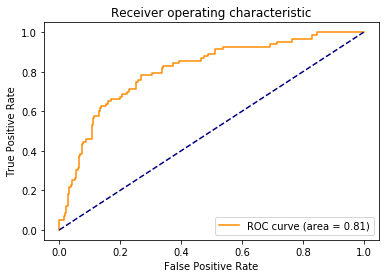

In [188]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [190]:
optimalF1 = 0
optimalTh = 0

In [192]:
thresholds[0:10]

array([1.90520595, 0.90520595, 0.87144429, 0.80771331, 0.78011586,
       0.77107167, 0.76255701, 0.75213816, 0.73647469, 0.73604909])

In [195]:
for th in thresholds:
    preds = np.where(lrmodel.predict_proba(X_train)[:,1] > th, 1, 0)
    f1Score = f1_score(y_train, preds)
    if(optimalF1 < f1Score):
        optimalF1 = f1Score
        optimalTh = th


C:\Users\SHARAT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [197]:
optimalF1 

0.47328244274809156

In [199]:
optimalTh

0.9052059502066636

In [201]:
THRESHOLD = optimalTh

In [204]:
preds = np.where(lrmodel.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [206]:
pd.DataFrame(data=[accuracy_score(y_test, preds), 
                   recall_score(y_test, preds), 
                   precision_score(y_test, preds),
                   f1_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.276667
recall,1.000000
precision,0.276667
f1_score,0.433420


# 2. Build best accuracy using Naive Bayes to find defaulters
1. Calculate train and test accuracies
2. Print 'Confusion Matrix'
3. Calculate Precision and Recall
4. Calculate ROC-AUC

# Build a model with better than 90% accuracy

# Any features interaction playing key role?